## Skincare Recommendation System Using Nearest Neighbors and Cosine Similarity

## **Import Library**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import re
import pickle

## **Load the Dataset**

In [34]:
# load the dataset
df = pd.read_csv('../Dataset/recommendation_dataset/skincare_dataset_fix.csv')

In [35]:
df.head()

,product_name,product_brand,category,subcategory,is_recommend,description_processed,concern,ingredients,skin_type,how_to_use,price,product_image_url,star_rating
0,Helichrysum Brightening Vit C Treatment,Skin Dewi,Treatment,Serum & Essence,1,skin dewi helichrysum brightening vit c treatm...,Skin Brightening,"Aqua, Ethyl Ascorbic Acid, Rubus Idaeus (Raspb...",All skin types,Aplikasikan pada wajah secara merata,Rp. 1.035.000,https://image.femaledaily.com/dyn/210/images/p...,5
1,Sublime Serum,Maharis Skin Care,Treatment,Serum & Essence,1,maharis skin care sublime serum serum khas mah...,"Skin Brightening, Uneven Skin Texture","Alpha Arbutin, Tranexamic Acid, Grapefruit Oil...",All skin types,Oleskan dengan lembut kepada wajah dan leher y...,Rp. 1.250.000,https://image.femaledaily.com/dyn/210/images/p...,5
2,Sea Buckthorn Reviving Elixir,Skin Dewi,Moisturizer,Face Oil,1,skin dewi sea buckthorn reviving elixir nutris...,"Skin Brightening, Hydration and Nourishment, W...","Camellia Oleifera Seed Oil, Oryza Sativa Bran ...",All skin types,Oleskan 1-2 pump di kulit bersih. Dapat diguna...,Rp. 1.350.000,https://image.femaledaily.com/dyn/210/images/p...,4
3,Facial Mask Bedak Dingin,Ovale,Mask,Wash-Off,1,ovale facial mask bedak dingin mutiara masker ...,"Skin Brightening, Uneven Skin Texture","Oryza Sativa Powder, Talc, Kaolin, Pearl powde...",All Skin Types,Aplikasikan pada seluruh wajah,Rp. 10.000,https://image.femaledaily.com/dyn/210/images/p...,4
4,Masker Bengkoang Bubuk,Mustika Ratu,Mask,Wash-Off,1,mustika ratu masker bengkoang bubuk masker waj...,"Skin Brightening, Uneven Skin Texture","Manihot utilissima strach, oryza sativa (rice)...",Dull skin.,Campurkan bubuk masker dengan air sari mawar p...,Rp. 10.000,https://image.femaledaily.com/dyn/210/images/p...,5


## **Pre-Processing**

In [36]:
df['category'].value_counts()


category
Treatment      308
Moisturizer    252
Cleanser       230
Mask            79
Name: count, dtype: int64

In [37]:
# Check the data types of all columns in the dataframe
print(df.dtypes)

product_name             object
product_brand            object
category                 object
subcategory              object
is_recommend              int64
description_processed    object
concern                  object
ingredients              object
skin_type                object
how_to_use               object
price                    object
product_image_url        object
star_rating               int64
dtype: object


In [38]:
# Checking for missing values
df.isna().sum()

product_name             0
product_brand            0
category                 0
subcategory              0
is_recommend             0
description_processed    0
concern                  1
ingredients              0
skin_type                0
how_to_use               0
price                    0
product_image_url        0
star_rating              0
dtype: int64

In [39]:
# Drop columns with missing value
df.dropna(inplace=True)
df.isna().sum()

product_name             0
product_brand            0
category                 0
subcategory              0
is_recommend             0
description_processed    0
concern                  0
ingredients              0
skin_type                0
how_to_use               0
price                    0
product_image_url        0
star_rating              0
dtype: int64

In [40]:
# Find duplicates in 'product_name' column
duplicates = df[df['product_name'].duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [product_name, product_brand, category, subcategory, is_recommend, description_processed, concern, ingredients, skin_type, how_to_use, price, product_image_url, star_rating]
Index: []


In [41]:
# Filter for categories
df2 = df[df['category'].isin(['Cleanser', 'Moisturizer', 'Mask', 'Treatment'])]

In [42]:
# Standardize text columns to lowercase for consistency
for column in ['product_name', 'product_brand', 'category', 'subcategory', 'description_processed', 'concern', 'ingredients', 'skin_type', 'how_to_use']:
    df2[column] = df2[column].str.lower()
df2.head()

,product_name,product_brand,category,subcategory,is_recommend,description_processed,concern,ingredients,skin_type,how_to_use,price,product_image_url,star_rating
0,helichrysum brightening vit c treatment,skin dewi,treatment,serum & essence,1,skin dewi helichrysum brightening vit c treatm...,skin brightening,"aqua, ethyl ascorbic acid, rubus idaeus (raspb...",all skin types,aplikasikan pada wajah secara merata,Rp. 1.035.000,https://image.femaledaily.com/dyn/210/images/p...,5
1,sublime serum,maharis skin care,treatment,serum & essence,1,maharis skin care sublime serum serum khas mah...,"skin brightening, uneven skin texture","alpha arbutin, tranexamic acid, grapefruit oil...",all skin types,oleskan dengan lembut kepada wajah dan leher y...,Rp. 1.250.000,https://image.femaledaily.com/dyn/210/images/p...,5
2,sea buckthorn reviving elixir,skin dewi,moisturizer,face oil,1,skin dewi sea buckthorn reviving elixir nutris...,"skin brightening, hydration and nourishment, w...","camellia oleifera seed oil, oryza sativa bran ...",all skin types,oleskan 1-2 pump di kulit bersih. dapat diguna...,Rp. 1.350.000,https://image.femaledaily.com/dyn/210/images/p...,4
3,facial mask bedak dingin,ovale,mask,wash-off,1,ovale facial mask bedak dingin mutiara masker ...,"skin brightening, uneven skin texture","oryza sativa powder, talc, kaolin, pearl powde...",all skin types,aplikasikan pada seluruh wajah,Rp. 10.000,https://image.femaledaily.com/dyn/210/images/p...,4
4,masker bengkoang bubuk,mustika ratu,mask,wash-off,1,mustika ratu masker bengkoang bubuk masker waj...,"skin brightening, uneven skin texture","manihot utilissima strach, oryza sativa (rice)...",dull skin.,campurkan bubuk masker dengan air sari mawar p...,Rp. 10.000,https://image.femaledaily.com/dyn/210/images/p...,5


In [43]:
df2['skin_type'] = df2['skin_type'].apply(lambda x: re.sub(r'\.', '', str(x)))
df2.head()

,product_name,product_brand,category,subcategory,is_recommend,description_processed,concern,ingredients,skin_type,how_to_use,price,product_image_url,star_rating
0,helichrysum brightening vit c treatment,skin dewi,treatment,serum & essence,1,skin dewi helichrysum brightening vit c treatm...,skin brightening,"aqua, ethyl ascorbic acid, rubus idaeus (raspb...",all skin types,aplikasikan pada wajah secara merata,Rp. 1.035.000,https://image.femaledaily.com/dyn/210/images/p...,5
1,sublime serum,maharis skin care,treatment,serum & essence,1,maharis skin care sublime serum serum khas mah...,"skin brightening, uneven skin texture","alpha arbutin, tranexamic acid, grapefruit oil...",all skin types,oleskan dengan lembut kepada wajah dan leher y...,Rp. 1.250.000,https://image.femaledaily.com/dyn/210/images/p...,5
2,sea buckthorn reviving elixir,skin dewi,moisturizer,face oil,1,skin dewi sea buckthorn reviving elixir nutris...,"skin brightening, hydration and nourishment, w...","camellia oleifera seed oil, oryza sativa bran ...",all skin types,oleskan 1-2 pump di kulit bersih. dapat diguna...,Rp. 1.350.000,https://image.femaledaily.com/dyn/210/images/p...,4
3,facial mask bedak dingin,ovale,mask,wash-off,1,ovale facial mask bedak dingin mutiara masker ...,"skin brightening, uneven skin texture","oryza sativa powder, talc, kaolin, pearl powde...",all skin types,aplikasikan pada seluruh wajah,Rp. 10.000,https://image.femaledaily.com/dyn/210/images/p...,4
4,masker bengkoang bubuk,mustika ratu,mask,wash-off,1,mustika ratu masker bengkoang bubuk masker waj...,"skin brightening, uneven skin texture","manihot utilissima strach, oryza sativa (rice)...",dull skin,campurkan bubuk masker dengan air sari mawar p...,Rp. 10.000,https://image.femaledaily.com/dyn/210/images/p...,5


In [44]:
# Fill missing concerns with predefined default concerns
top_concerns = {
    'cleanser': 'general care',
    'mask': 'uneven skin texture',
    'treatment': 'acne',
    'moisturizer': 'hydration and nourishment'
}

In [45]:
# Handle missing concern data
for i in range(len(df2)):
    if pd.isnull(df2.iloc[i]['concern']):
        df2.iloc[i, df2.columns.get_loc('concern')] = top_concerns[df2.iloc[i]['category']]

# Define features: skin types and concerns
features = ['all skin types', 'normal skin', 'dry skin', 'oily', 'combination', 'acne', 'sensitive', 'wrinkles',
            'dark circle', 'skin brightness', 'uneven skin texture', 'skin dullness', 'hydration and nourishment', 'general care']

## **Exploratory Data Analysis**

Dataset shape: (868, 13)


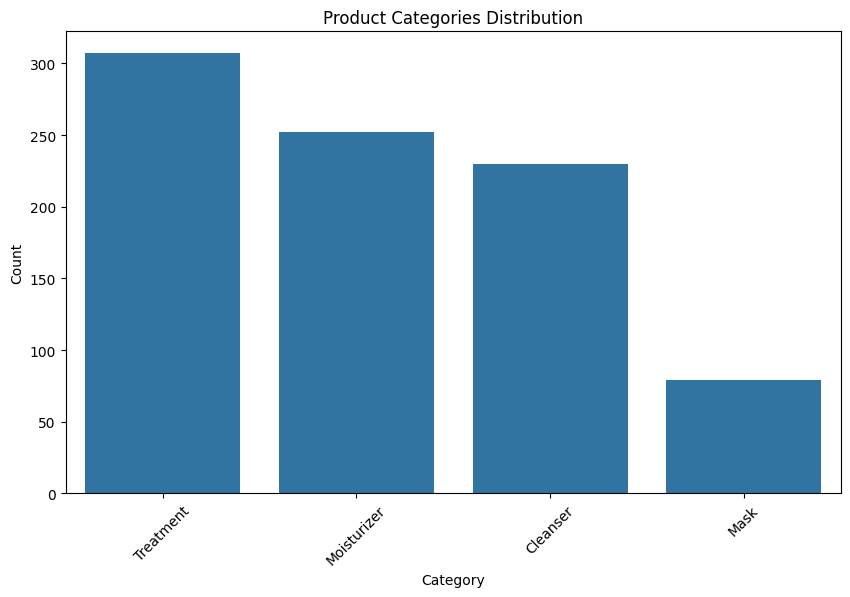

In [46]:
# Shape of the dataset
print(f"Dataset shape: {df.shape}")

# Distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

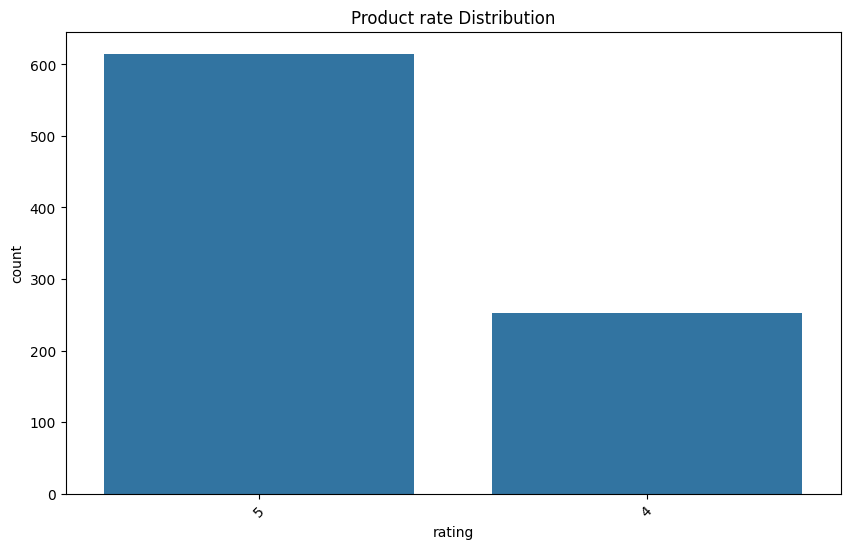

In [56]:
# Distribution of star_rating
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='star_rating', order=df['star_rating'].value_counts().index)
plt.title('Product rate Distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

## **One-Hot Encoding**

In [47]:
# One-hot encode the features
one_hot_encodings = np.zeros((len(df2), len(features)))

for i in range(len(df2)):
    # Skin types (first 5 features)
    sk_type = df2.iloc[i]['skin_type']
    if sk_type == 'all':
        one_hot_encodings[i][:5] = 1
    else:
        if sk_type in features[:5]:
            one_hot_encodings[i][features.index(sk_type)] = 1
    
    # Concerns (remaining features)
    concerns = df2.iloc[i]['concern'].split(',')
    for concern in concerns:
        concern = concern.strip()
        if concern in features:
            one_hot_encodings[i][features.index(concern)] = 1

In [48]:
# Print the shape of one_hot_encodings
print("Shape of one_hot_encodings:", one_hot_encodings.shape)

# Check if one_hot_encodings contains any non-zero rows
if one_hot_encodings.sum() == 0:
    print("Warning: One-hot encoding resulted in empty data.")


Shape of one_hot_encodings: (868, 14)


## **Build the Recommendation**


In [49]:
# # Build the recommendation using Nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(one_hot_encodings)
distances, indices = nbrs.kneighbors(one_hot_encodings)

In [50]:
# Utility function to get product recommendations by index
def recs_nn(query=None, id=None):
    if id is not None:
        for id in indices[id][1:]:
            print(df2.iloc[id]["product_name"])
    if query:
        found_id = name2index(query)
        for id in indices[found_id][1:]:
            print(index2prod(id))

# Helper functions to get product index from name and vice versa
def name2index(name):
    return df2[df2["product_name"] == name].index.tolist()[0]

def index2prod(index):
    return df2.iloc[index]

## **Cosine Similarity**

In [57]:
# Utility function to format the recommended product data
def wrap(info_arr):
    result = {
        'product_name': info_arr[0],
        'product_brand': info_arr[1],
        'price': info_arr[5], # Price is at index 5
        'skin_type': info_arr[3], # Skin type is at index 3
        'product_image_url': info_arr[6], # Image URL is at index 6
        'ingredients': info_arr[2] # Ingredients is at index 2
    }
    return result


# Cosine similarity-based recommendation function
def recs_cs(vector=None, product_name=None, category=None, count=8):
    products = []
    if product_name:
        idx = name2index(product_name)
        fv = one_hot_encodings[idx]
    elif vector is not None:
        fv = vector
    else:
        return []

    # Calculate cosine similarity
    cs_values = cosine_similarity(np.array([fv]), one_hot_encodings)
    df2['cs'] = cs_values[0]

    # Filter by category if provided
    if category:
        dff = df2[df2['category'] == category]
    else:
        dff = df2

    # Exclude the product itself
    if product_name:
        dff = dff[dff['product_name'] != product_name]

    # Sort by cosine similarity and get top recommendations
    recommendations = dff.sort_values('cs', ascending=False).head(count)
    data = recommendations[['product_name', 'product_brand', 'ingredients', 'skin_type', 'concern', 'price', 'product_image_url']].to_dict('split')['data']
    
    for element in data:
        products.append(wrap(element))
    return products




In [58]:
# Overall recommendation function across categories
def recs_essentials(vector=None, product_name=None):
    response = {}
    LABELS = df2['category'].unique()  
    
    # Loop through all categories and get recommendations
    for label in LABELS:
        if product_name:
            # Call the recs_cs function with product name
            r = recs_cs(None, product_name, label)  
        elif vector:
             # Call the recs_cs function with feature vector
            r = recs_cs(vector, None, label) 
        response[label] = r
    return response


## **Generate Recommendation**

In [59]:
# features = ['all skin types', 'normal skin', 'dry skin', 'oily', 'combination', 'acne', 'sensitive', 'wrinkles',
#             'dark circle', 'skin brightness', 'uneven skin texture', 'skin dullness', 'hydration and nourishment', 'general care']

# Example usage: query using a feature vector
x = [0, 1, 1, 0, 0, 0, 0, 1, 
     1, 0, 0, 0, 0, 0] 
recommendations = recs_essentials(x, None)

# Example: printing recommended products
for category, recs in recommendations.items():
    print(f"Recommendations for category {category}: ")
    for rec in recs:
        # Printing the recommended products in the required format
        print(f"- {rec['product_name']} by {rec['product_brand']}")
        print(f"  Price: {rec['price']}")
        print(f"  Suitable for: {rec['skin_type']}")
        print(f"  Ingredients: {rec['ingredients']}")
        print(f"  Product Image: {rec['product_image_url']}\n")

Recommendations for category treatment: 
- rosehip eye cream by for skin's sake (fss)
  Price: Rp. 230.000
  Suitable for: dry to normal eye skin
  Ingredients: nya dan diperkaya dengan hibiscus extract, dengan tekstur yang cukup kental, sehingga sanggat cocok untuk bagian kulit mata yang lebih kering dan mudah berkeriput. dan juga membantu menjaga elastisitas kulit area mata dan mengisi kerutan-kerutan halus.
  Product Image: https://s3.ap-southeast-1.amazonaws.com/assets.femaledaily.com/remastering-data/production/product/product-1704942486972-For-Skin-27s-Sake-28FSS-29-Rosehip-Eye-Cream

- best version of your skin tinted eye cream by glow better
  Price: Rp. 75.000
  Suitable for: - men and women from the age of 14
  Ingredients: aqua, triheptanoin, glycerin, acrylamide/sodium acryloyldimethyltaurate copolymer, titanium dioxide, c13-15 alkane, silica, caprylic/capric triglyceride, c13-14 alkane, diheptyl succinate, polyglyceryl-6 polyhydroxystearate, ci 77492, dicaprylyl ether, pol

In [60]:
def average_precision(relevance):
    """
    Calculate Average Precision (AP) for a single user's recommendations.
    Arguments:
        relevance: List or array of binary relevance values (1 for relevant, 0 for irrelevant).
    Returns:
        Average Precision (AP) score.
    """
    relevant = np.array(relevance)
    precisions = []
    for i in range(len(relevant)):
        if relevant[i] == 1:
            # Calculate precision at rank i+1
            precision_at_i = np.sum(relevant[:i + 1]) / (i + 1)
            precisions.append(precision_at_i)
    return np.mean(precisions) if precisions else 0  # Return 0 if no relevant items

def mean_average_precision(recommendations):
    """
    Calculate Mean Average Precision (MAP) for multiple users.
    Arguments:
        recommendations: List of lists, where each sublist contains binary relevance values for a user's recommendations.
    Returns:
        MAP score.
    """
    average_precisions = [average_precision(user) for user in recommendations]
    return np.mean(average_precisions)

recommendations = [
    [1, 0, 0, 1, 0],  
    [1, 0, 0, 0, 0]
]

# Calculate MAP
map_score = mean_average_precision(recommendations)
print(f"Mean Average Precision (MAP): {map_score:.2f}")


Mean Average Precision (MAP): 0.88


In [61]:
# Save the model (NearestNeighbors) and the one-hot encoding matrix
with open('recommendation_model_ver1.pkl', 'wb') as f:
    pickle.dump({
        'nbrs': nbrs, 
        'one_hot_encodings': one_hot_encodings,
        'df2': df2
    }, f)